# DEEP LEARNING MODEL ON MNIST DATASET

## The architecture of this model comprises of three hidden layer with 500, 250 and 100 being their respective sizes

---

### The aim is to model a complete handwritten digit recognizer, train it on the train set comprising 60,000 images and test performance on the test set comprising 10,000 images

---

## Baseline model includes: 
   - **Training data size of MNIST data = 60,000**
       * **with its respective batch size being 64**
   - **Testing data size of MNIST data = 10,000**
   - **Learning rate = 0.01**
   - **number of epochs = 15** 
   


## **Importing Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as data
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots


Setting up to GPU

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## **Importing the MNIST dataset**


In [3]:
train_set = data.MNIST(root = 'MNIST/raw/train-images-idx3-ubyte', train = True, transform= ToTensor(), download = True)
test_set = data.MNIST(root= 'MNIST/raw/train-images-idx3-ubyte', train= False, transform= ToTensor(), download = True)

### Loading the data using DataLoader 

Feature batch shape: torch.Size([60000, 28, 28])
Labels batch shape: torch.Size([60000])


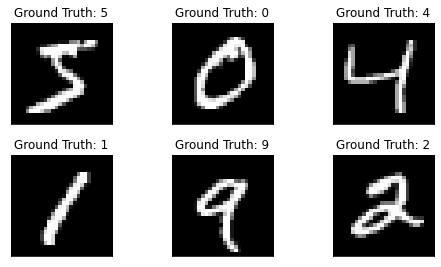

In [4]:
train_features = train_set.data #getting images
train_labels = train_set.targets #getting labels
# Visualising data
# Display image and label

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(train_features[i].squeeze(), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()


## One Hot Encoding

In [5]:
"""
convert the labels into one-hot format before training and testing the network
"""
def one_hot_encode(Y):
  output = np.eye(10)[np.array(Y).reshape(-1)]
  return output.reshape(list(np.shape(Y))+[10])


## **Activation** **Functions** 
**Actvation functions and their respective derivatives**

**(1) Sigmoid**

**(2) ReLu**

**(3) TanH**

**(2) Softmax**

In [6]:
#ACTIVATION FUNCTIONS
def activation(x, a_type = 'SOFTMAX'):
 
  if a_type == 'SIGMOID':
    return 1/(1+np.exp(-x))

  if a_type == 'RELU':
    return np.maximum(0,x)

  if a_type == 'TANH':
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

  if a_type == 'SOFTMAX':
    return np.exp(x)/sum(np.exp(x))
    
#DERIVATIVES OF ACTIVATION FUNCTIONS FOR BACK PROPAGATION

def derivative(x, d_type = 'SIGMOID'):

  if d_type == 'SIGMOID':
    s = activation(x, 'SIGMOID')
    return (s*(1-s))

  elif d_type == 'RELU':
    return (x>0)

  elif d_type == 'TANH':
    t = activation(x, 'TANH')
    return (1-t**2)

# **BASELINE**

## (1) Data Flattening


In [7]:
# Flattening and normalising

def data_flattening(features, labels, one_hot = True):
    features = features.numpy()
    labels = labels.numpy()
    X = (features.reshape(features.shape[0], -1)).T
    if one_hot:
      Y = one_hot_encode(labels)
    else:
      Y = labels
    return X, Y

## (2) Initialising Parameters





In [8]:
batchsize = 64
input_size = (train_features.reshape(train_features.shape[0],-1)).shape[1]
hidden_layer_1 = 500
hidden_layer_2 = 250
hidden_layer_3 = 100
output_layer = 10
n_epochs = 15
learning_rate = 0.01

In [9]:
"""
Function to Initialise the parameters -weights and biases
W1, W2, W3, W4, b1, b2, b3, b4
for the network {i/p -> 500 -> 250 -> 100 ->o/p}
The parameters here are initialised by Xavier initialisation and is one of the common ways of initialisation
"""
def initialise_parameter(dim):
  np.random.seed(11)

  parameters = {}
  L = len(dim)
  for i in range(1, L):
    Ni = dim[i-1]
    No = dim[i]
    M = np.sqrt(6/(Ni+No)) 
    parameters["W" + str(i)] = np.asarray(np.random.uniform(-M, M,size = (No,Ni)))
    parameters["b" + str(i)] = np.zeros((dim[i], 1))
        
    assert(parameters["W" + str(i)].shape == (dim[i], dim[i-1]))
    assert(parameters["b" + str(i)].shape == (dim[i], 1))
  return parameters


## (3) Forward propagation function 

- **using Sigmoid**

- **using TanH**

- **using ReLu**

In [10]:
#Function to implement forward propagation
"""
Retrieving the parameters
Linear function on the inputs followed by activation functions

---

In this code we have only got the outputs for Sigmoid and TanH, 
for relu seperate code follows

"""
def forward_propagation(X, parameters, forward):
   # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    W4 = parameters["W4"]
    b4 = parameters["b4"]

    # FORWARD PROPOGATION : LINEAR -> SIGMOID -> LINEAR -> SIGMOID -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX
    # FORWARD PROPOGATION : LINEAR -> TANH -> LINEAR -> TANH -> LINEAR -> TANH -> LINEAR -> SOFTMAX
    # FORWARD PROPOGATION : LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX

    Z1 = np.dot(W1, X) + b1
    A1 =activation(Z1, a_type = forward) # Sigmoid or ReLu or TanH

    Z2 = np.dot(W2, A1) + b2
    A2 = activation(Z2, a_type = forward) # Sigmoid or ReLu or TanH

    Z3 = np.dot(W3, A2) + b3
    A3 = activation(Z3, a_type = forward) # Sigmoid or ReLu or TanH

    Z4 = np.dot(W4, A3) + b4
    A4 = activation(Z4, a_type = 'SOFTMAX') # Softmax
    
    cache = {
        "Z1" : Z1, "Z2" : Z2, "Z3" : Z3, "Z4" : Z4, 
        "A1" : A1, "A2" : A2, "A3" : A3, "A4" : A4,
        "W1" : W1, "W2" : W2, "W3" : W3, "W4" : W4,
        "b1" : b1, "b2" : b2, "b3" : b3, "b4" : b4}

    return A4, cache


## (4) Backward Propagation


In [11]:
#Function to implement Backward Propagation
"""
Back Propagation is to get the gradients which will be used
to update the parameters by gradient descent method

"""
def backward_propagation(X, Y, cache, activation):
  
  m = batchsize
  A4 = cache["A4"]
  A3 = cache["A3"]
  A2 = cache["A2"]
  A1 = cache["A1"]
  Z4 = cache["Z4"]
  Z3 = cache["Z3"]
  Z2 = cache["Z2"]
  Z1 = cache["Z1"]
  W4 = cache["W4"]
  W3 = cache["W3"]
  W2 = cache["W2"]
  W1 = cache["W1"]
  b4 = cache["b4"]
  b3 = cache["b3"]
  b2 = cache["b2"]
  b1 = cache["b1"]

  dZ4 = A4 - Y
  dW4 = 1./m * np.dot(dZ4, A3.T)
  db4 = 1./m * np.sum(dZ4, axis=1, keepdims = True)

  dA3 = np.dot(W4.T, dZ4)
  dZ3 = np.multiply(dA3, derivative(A3, d_type = activation))
  dW3 = 1./m * np.dot(dZ3, A2.T)
  db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

  dA2 = np.dot(W3.T, dZ3)
  dZ2 = np.multiply(dA2, derivative(A2, d_type = activation))
  dW2 = 1./m * (np.dot(dZ2, A1.T))
  db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
  dA1 = np.dot(W2.T, dZ2)
  dZ1 = np.multiply(dA1, derivative(A1, d_type = activation))
  dW1 = 1./m * (np.dot(dZ1, X.T))
  db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

  gradients = {"dW4": dW4, "db4": db4,
              "dW3": dW3, "db3": db3,
              "dW2": dW2, "db2": db2,
              "dW1": dW1, "db1": db1}

  return gradients


## (5) Update Parameters


In [12]:
#Function to update the parameters
"""
Updating the parameters for the next iteration
in order to train the model

---

returns the updated gradients
"""
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    W4 = parameters["W4"]
    b4 = parameters["b4"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    dW4 = grads["dW4"]
    db4 = grads["db4"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    W4 = W4 - learning_rate * dW4
    b4 = b4 - learning_rate * db4
    
    parameters={"W1":W1, "b1":b1,
                "W2":W2, "b2":b2,
                "W3":W3, "b3":b3,
                "W4":W4, "b4":b4}
    return parameters

## (6) Compute Cost


In [13]:
"""
Function to compute cross entropy cost
---
Cross Entropy Loss is used to compute the cost in case of classification models
"""
def compute_cost(A, Y):
  m = Y.shape[1]
  logprobs = np.multiply(-np.log(A),Y) + np.multiply(-np.log(1 - A), (1 - Y))
  cost = 1./m * np.nansum(logprobs)
  return cost

## (8) Predict Labels

In [14]:
# Predict
def predict(X, Y, parameters, batchsize = batchsize):
    
    m = batchsize
    y = Y.T
    p = np.zeros((m), dtype = np.int)
    y = y.numpy()
    # Forward propagation
    a4, caches = forward_propagation(X, parameters)
    print(a4)
    p = np.argmax(a4, axis = 0)
    # print results
    print(f"predicted_value is {p}")
    print(f"label value is {y}")
    print("Accuracy: "  + str(np.mean((p == y))))
    return p

## (9) Accuracy 

In [15]:
"""
Computing the accuracy of the testing and training sets

---
returns the actual and predicted value of y
prints the accuracy

"""

def Accuracy(dataset, parameters, forward, size):
  
    features = dataset.data
    labels = dataset.targets
    X, Y = data_flattening(features, labels, one_hot = False)
    y = Y.T
    p = np.zeros(size, dtype = int)
    # Forward propagation
    a4, caches = forward_propagation(X, parameters, forward)
    p = np.argmax(a4, axis = 0)
    a = np.mean((p == y))
    print("accuracy is =" + str(a))
    return y, p

## (10) Gradient Descent Model

In [24]:
"""
Model to implement Neural Network by Gradient Descent
---
This function will run once for the entire dataset
---
Input parameters are - train_loader, parameters, type of activation, Learning rate, iterations and lamda
---
This function trains model for both regularised and unregularised 

"""
def gradient_descent(dataloader, parameters, forward, learning_rate = 0.01, number_of_iterations = int(60000/batchsize), lambd = 0):

    grads = {}
    costs = []
    cost_out = []
    m = batchsize  #number of examples
    for i in range(0, number_of_iterations):
        features, labels = next(iter(dataloader))
        X, Y = data_flattening(features, labels, True)
        a4, cache = forward_propagation(X, parameters, forward)   # FORWARD PROPOGATION : LINEAR -> SIGMOID -> LINEAR -> SIGMOID -> LINEAR -> SIGMOID -> LINEAR -> SOFTMAX
        # Cost function
        if lambd == 0:
            cost = compute_cost(a4, Y.T)
            grads = backward_propagation(X, Y.T, cache, forward)
        else:
            cost = compute_cost_with_regularization(a4, Y.T, parameters, lambd)
            grads = backward_propagation_with_regularization(X, Y.T, cache, lambd, forward)

        parameters = update_parameters(parameters, grads, learning_rate)   # Update parameters
        costs.append(cost)
        if i%200==0 or i==(number_of_iterations-1): 
                print("Cost after iteration {}: {}".format(i, cost))
                #plot the cost
                plt.plot(costs)
                plt.ylabel('cost')
                plt.xlabel('iterations')
                plt.title("Learning rate =" + str(learning_rate))
                plt.show()
                costs = []   
        if i%500 == 0:
            cost_out.append(cost)
            acc = []
            # Load images to a Torch Variable
            images = train_set.data
            labels_1 = train_set.targets
            X, Y = data_flattening(images, labels_1, one_hot = False)
            y = Y.T
            predicted = np.zeros(60000, dtype = int)
            # Forward propagation
            a4, caches = forward_propagation(X, parameters, forward)
            predicted = np.argmax(a4, axis = 0)
            accuracy = np.mean((predicted == y))
            # Print Loss
            acc.append(accuracy)

    return parameters, cost_out, acc


# Neural Network

In [27]:
"""
Neural Network Function
---
Calls the model for the epoch number of times
"""

def NeuralNet(dataset, forward = 'SIGMOID', learning_rate = 0.01, n_epochs = 1, batch_size = batchsize, lambd = 0):
    costs = []
    accuracy = []
    m = batch_size #number of examples
    layers_dim = [input_size, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer]
    parameters = initialise_parameter(layers_dim)
    for epoch in range(n_epochs):
        print(f"Epoch :- {epoch+1}")
        train_dataloader = DataLoader(train_set, batch_size=batchsize, shuffle=True)
        parameters, cost, acc = gradient_descent(train_dataloader, parameters, forward, learning_rate = learning_rate, number_of_iterations = int(60000/batchsize), lambd = lambd)
        print (f'Epoch [{epoch+1}/{n_epochs}], Cost: {cost[-1]}, Accuracy: {acc[-1]}')
        accuracy.append(acc)
        costs.append(cost)
    #plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters, accuracy

# Training

### Sigmoid Activation Function

Epoch :- 1
Cost after iteration 0: 3.4647339306614118


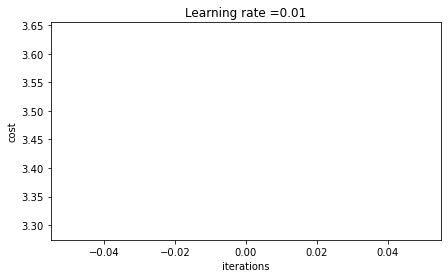

Cost after iteration 200: 3.2457291994114


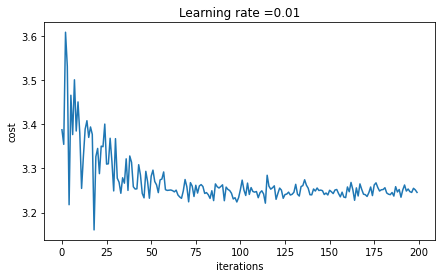

Cost after iteration 400: 3.235647111293602


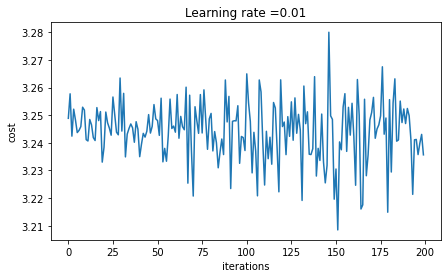

Cost after iteration 600: 3.236666266711592


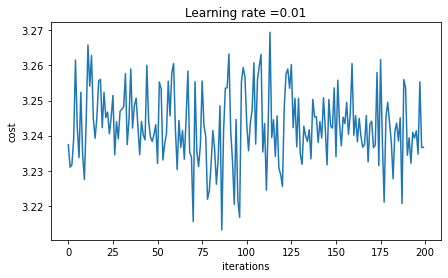

Cost after iteration 800: 3.2244548263792696


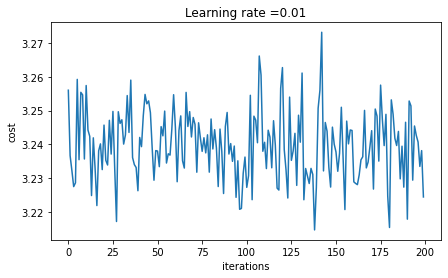

Cost after iteration 936: 3.2309806985505696


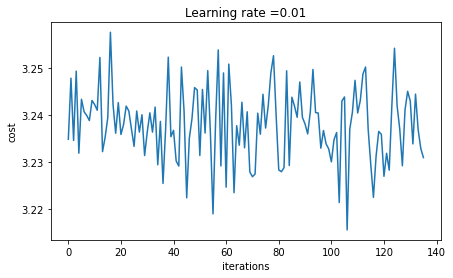

Epoch [1/15], Cost: 3.2566605060991876, Accuracy: 0.13483333333333333
Epoch :- 2
Cost after iteration 0: 3.236732762789268


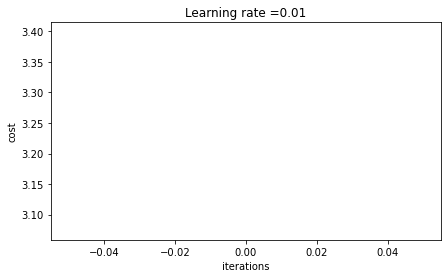

Cost after iteration 200: 3.218014746539764


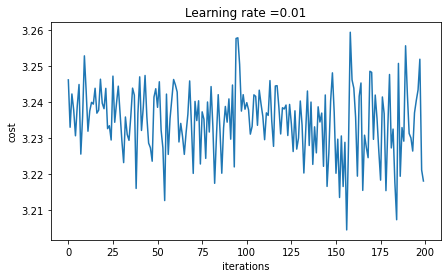

Cost after iteration 400: 3.2417544237607907


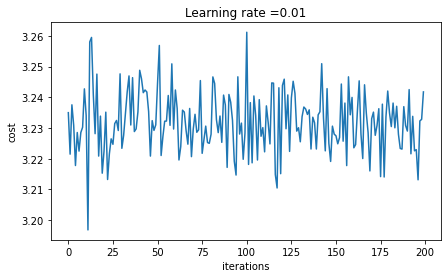

Cost after iteration 600: 3.210829929529309


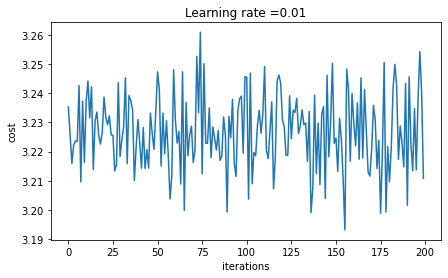

Cost after iteration 800: 3.204540819373948


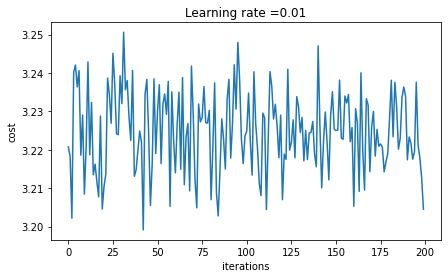

Cost after iteration 936: 3.2201220286766827


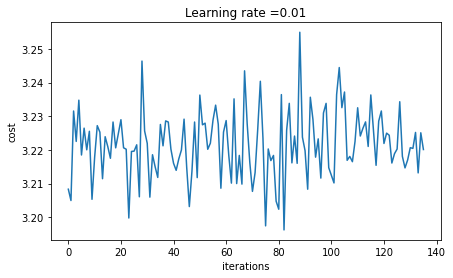

Epoch [2/15], Cost: 3.2457468357850594, Accuracy: 0.4289
Epoch :- 3
Cost after iteration 0: 3.220547597006748


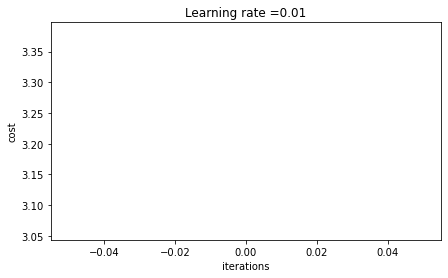

Cost after iteration 200: 3.2194189412214453


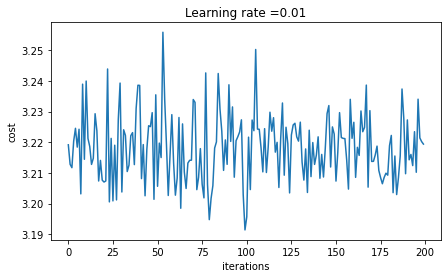

Cost after iteration 400: 3.211528304789147


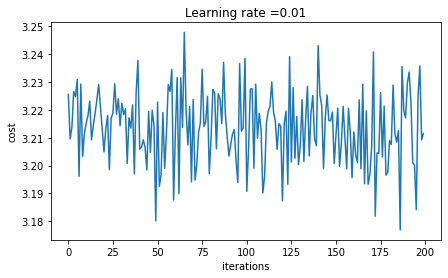

Cost after iteration 600: 3.2217112848968448


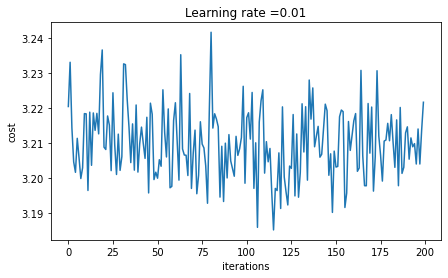

Cost after iteration 800: 3.2201764857582287


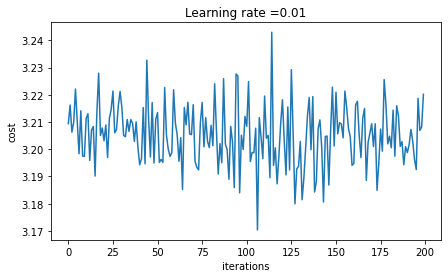

Cost after iteration 936: 3.1826197305888275


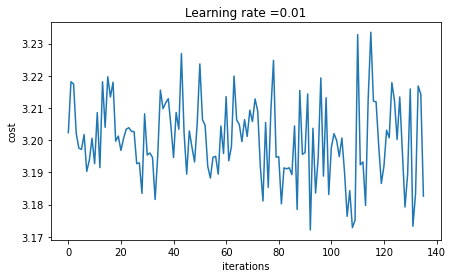

Epoch [3/15], Cost: 3.1985808305161654, Accuracy: 0.5353833333333333
Epoch :- 4
Cost after iteration 0: 3.1929611959545845


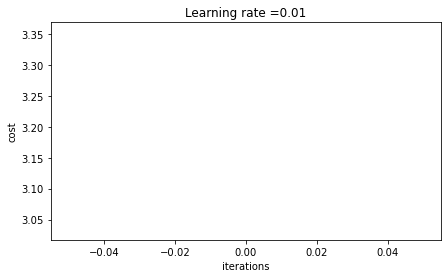

Cost after iteration 200: 3.196154842556984


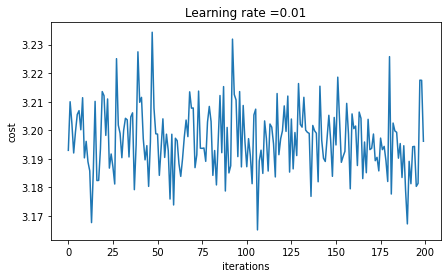

Cost after iteration 400: 3.1732424664056262


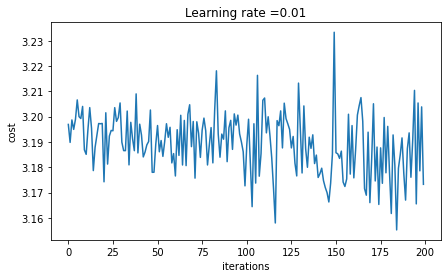

/home/mansi/.conda/envs/hbp/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Cost after iteration 600: 3.1741294333418524


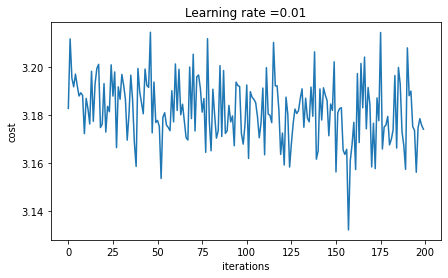

Cost after iteration 800: 3.1713335822699698


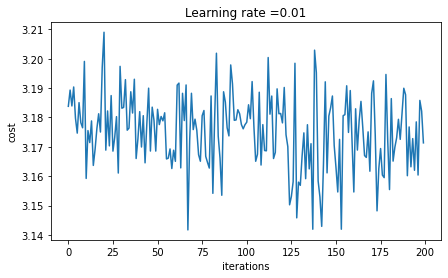

Cost after iteration 936: 3.171747897381056


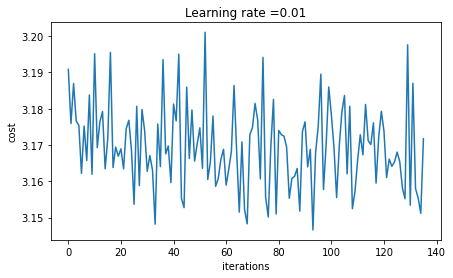

Epoch [4/15], Cost: 3.1758829421875276, Accuracy: 0.63725
Epoch :- 5
Cost after iteration 0: 3.163528219311457


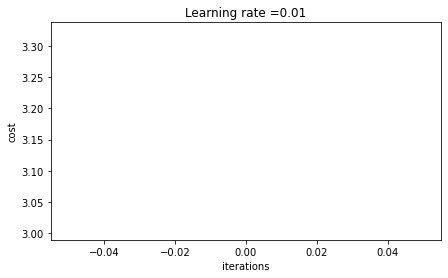

Cost after iteration 200: 3.142846703068507


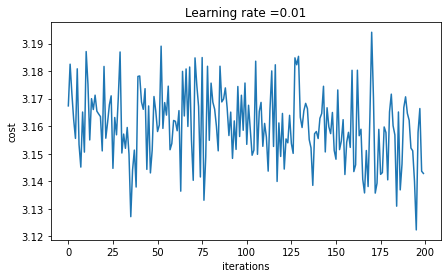

Cost after iteration 400: 3.1571499634154883


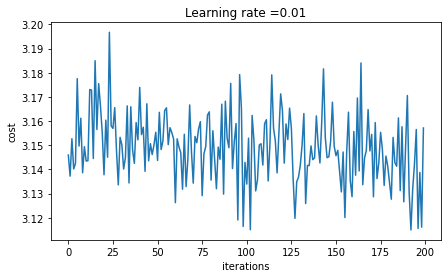

Cost after iteration 600: 3.136122673773341


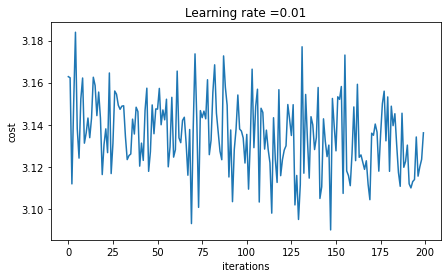

Cost after iteration 800: 3.0765399630370256


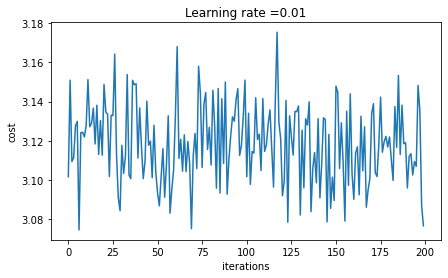

Cost after iteration 936: 3.1061470196994483


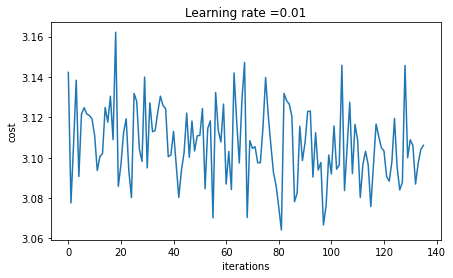

Epoch [5/15], Cost: 3.121757721066066, Accuracy: 0.6000833333333333
Epoch :- 6
Cost after iteration 0: 3.085378377574582


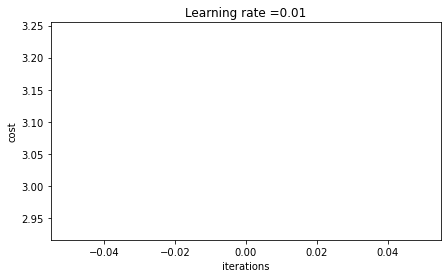

Cost after iteration 200: 3.0640795968657564


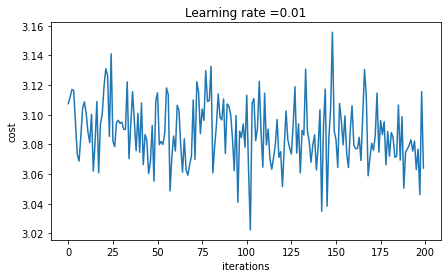

Cost after iteration 400: 3.0812497131593997


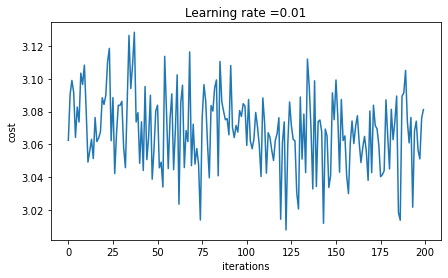

Cost after iteration 600: 3.027735248112406


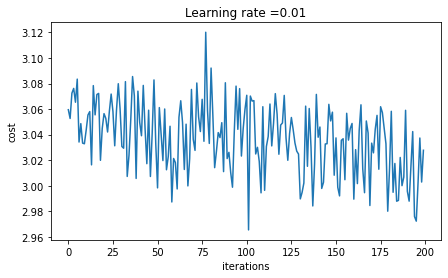

Cost after iteration 800: 3.016833904315064


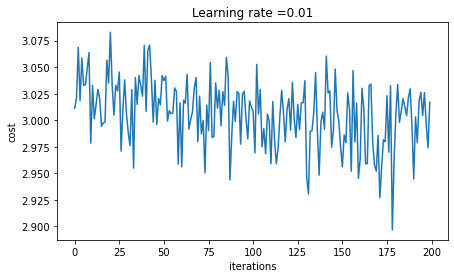

Cost after iteration 936: 2.9267662399600622


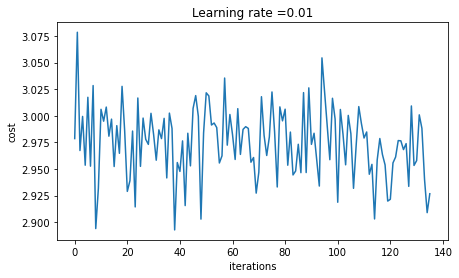

Epoch [6/15], Cost: 3.059799623754097, Accuracy: 0.5427666666666666
Epoch :- 7
Cost after iteration 0: 2.980341730848915


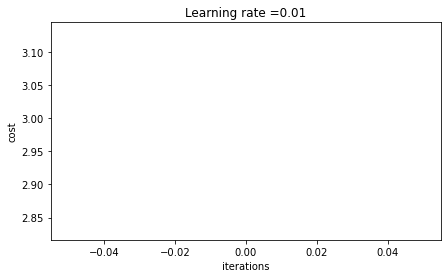

Cost after iteration 200: 2.8626645745466592


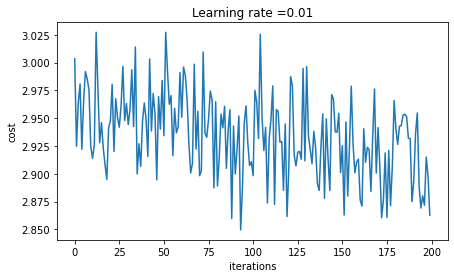

Cost after iteration 400: 2.8470108240055882


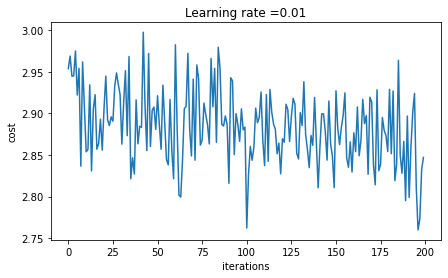

Cost after iteration 600: 2.809056560499611


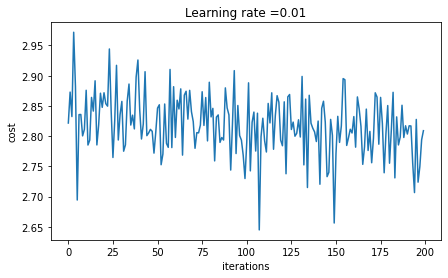

Cost after iteration 800: 2.641469860454758


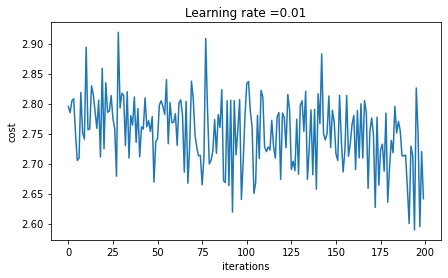

Cost after iteration 936: 2.6435094081675077


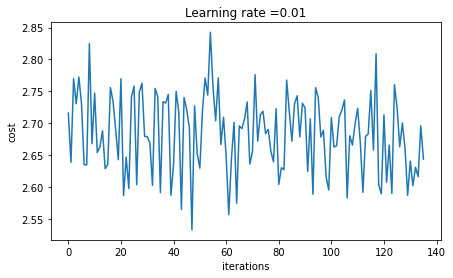

Epoch [7/15], Cost: 2.7299604951752423, Accuracy: 0.494
Epoch :- 8
Cost after iteration 0: 2.648427238800444


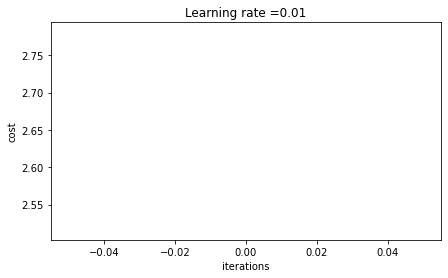

Cost after iteration 200: 2.6072173021068514


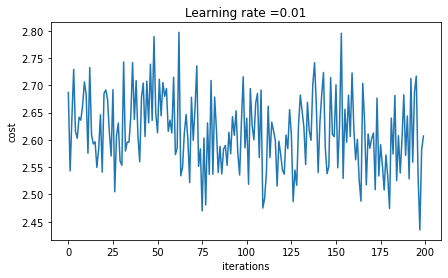

Cost after iteration 400: 2.3762834332551233


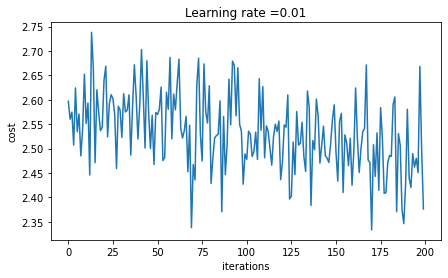

Cost after iteration 600: 2.5094318869962047


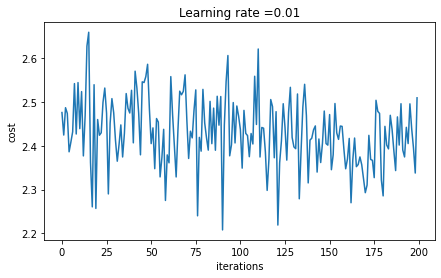

Cost after iteration 800: 2.2996204688502324


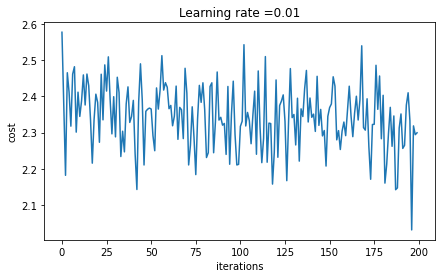

Cost after iteration 936: 2.289307012060443


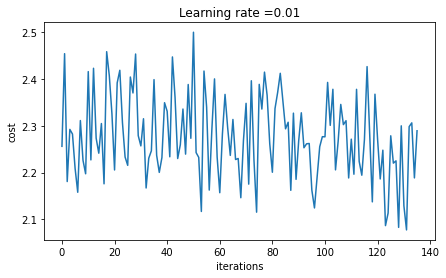

Epoch [8/15], Cost: 2.4675729328264064, Accuracy: 0.5211666666666667
Epoch :- 9
Cost after iteration 0: 2.1349423915999632


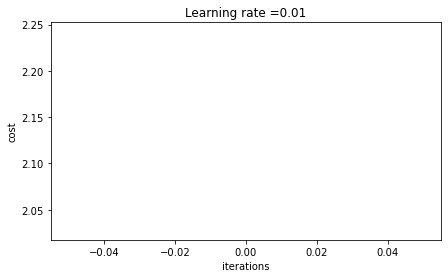

Cost after iteration 200: 2.115260356287938


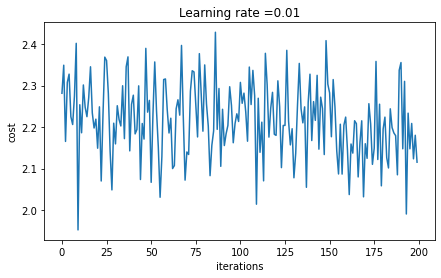

Cost after iteration 400: 2.065696181539227


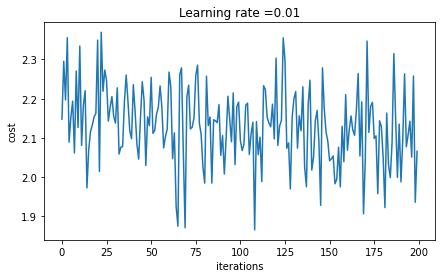

Cost after iteration 600: 2.0945075986002895


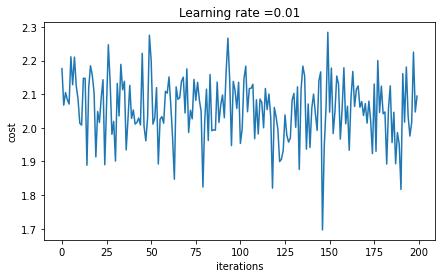

Cost after iteration 800: 1.8055696991330397


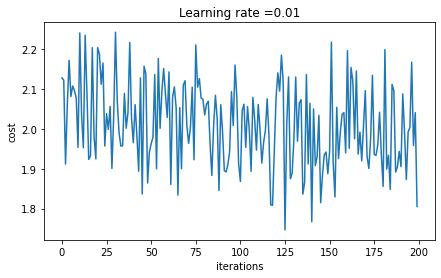

Cost after iteration 936: 1.8514682084133738


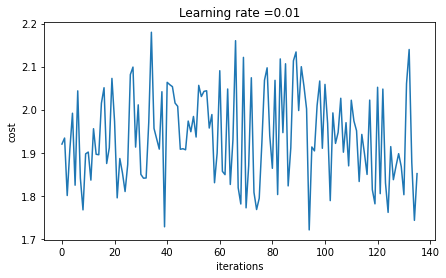

Epoch [9/15], Cost: 2.135630847762451, Accuracy: 0.5550833333333334
Epoch :- 10
Cost after iteration 0: 2.009245019411905


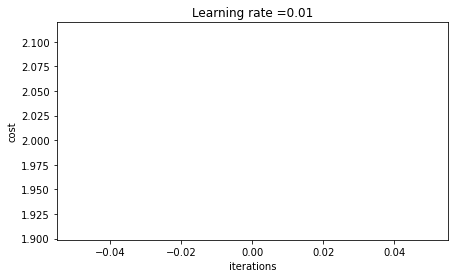

Cost after iteration 200: 1.869809824586968


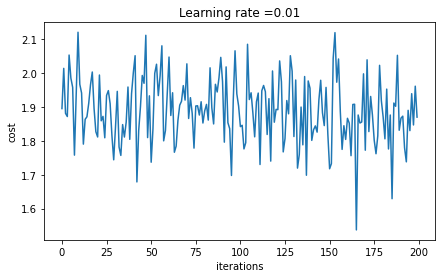

Cost after iteration 400: 1.8103590445257591


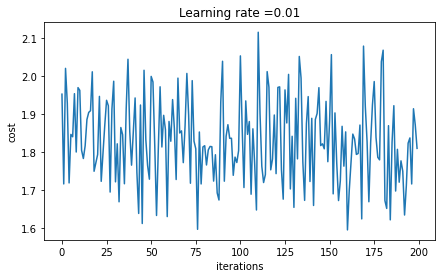

Cost after iteration 600: 1.596914943188504


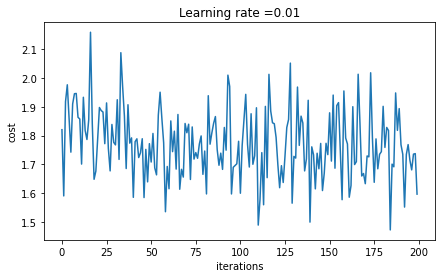

Cost after iteration 800: 1.6889245798933357


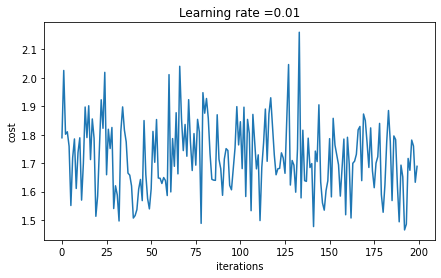

Cost after iteration 936: 1.927557667280667


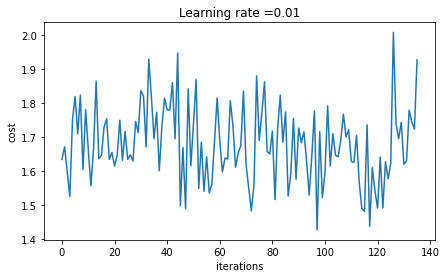

Epoch [10/15], Cost: 1.7801304544130927, Accuracy: 0.59765
Epoch :- 11
Cost after iteration 0: 1.7849412681433527


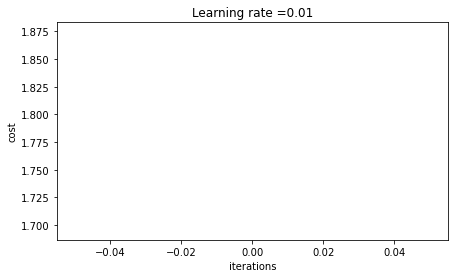

Cost after iteration 200: 1.5681306431594138


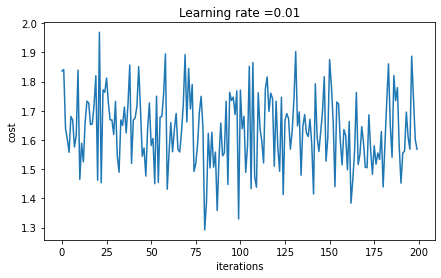

Cost after iteration 400: 1.6986074574636303


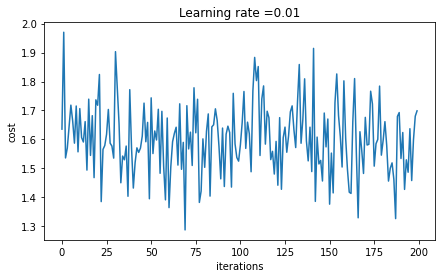

Cost after iteration 600: 1.5346210043258097


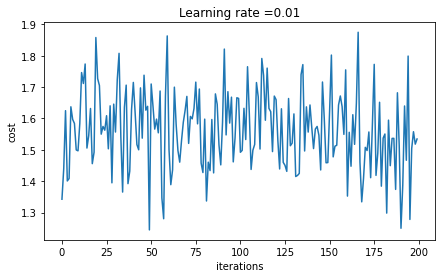

Cost after iteration 800: 1.2997504646859706


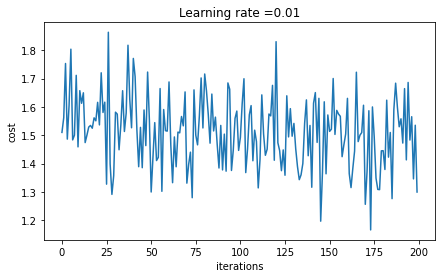

Cost after iteration 936: 1.4667217538339994


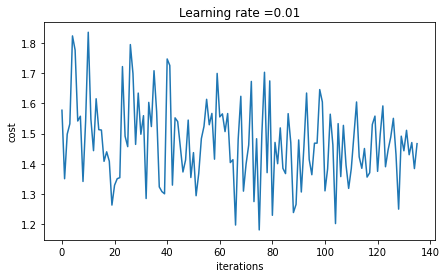

Epoch [11/15], Cost: 1.6638990871114263, Accuracy: 0.6232833333333333
Epoch :- 12
Cost after iteration 0: 1.554941055927423


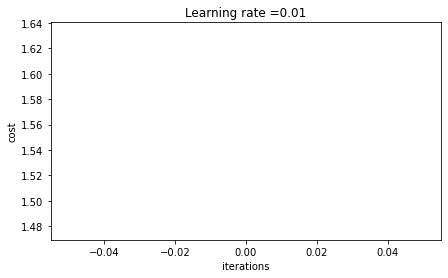

Cost after iteration 200: 1.6140951144561053


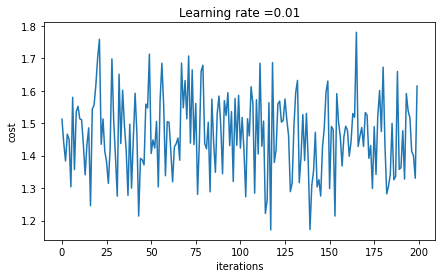

Cost after iteration 400: 1.3092762540662415


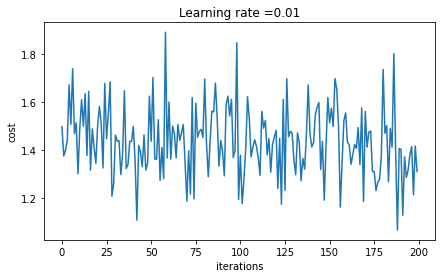

Cost after iteration 600: 1.4152232343114877


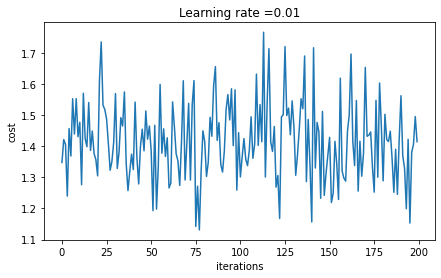

Cost after iteration 800: 1.333098008058121


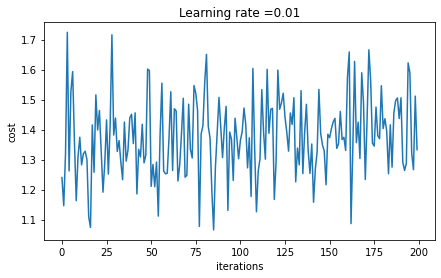

Cost after iteration 936: 1.257216077152057


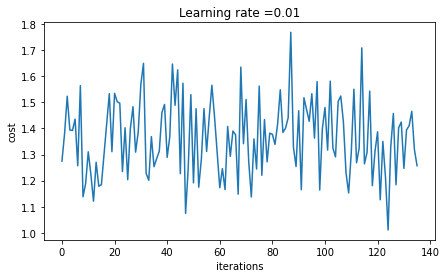

Epoch [12/15], Cost: 1.4440792626313197, Accuracy: 0.6473
Epoch :- 13
Cost after iteration 0: 1.448428244889461


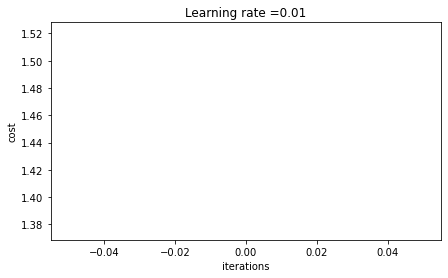

Cost after iteration 200: 1.5356604135914724


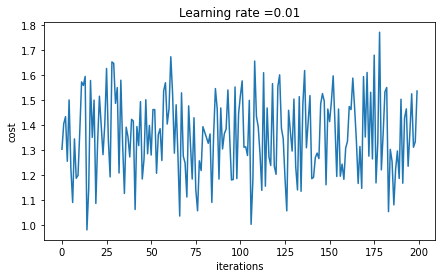

Cost after iteration 400: 1.2554026566180134


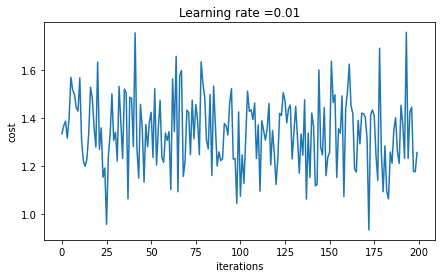

Cost after iteration 600: 1.4062430082694046


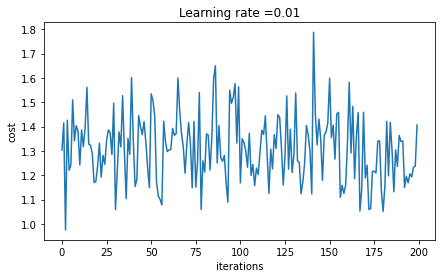

Cost after iteration 800: 1.2994706642945613


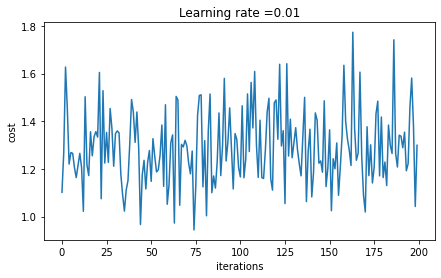

Cost after iteration 936: 1.2871929845619743


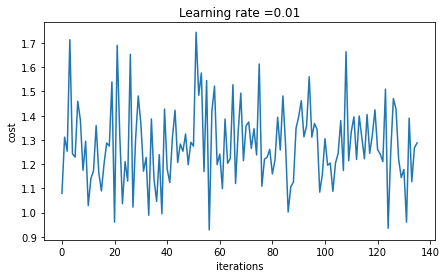

Epoch [13/15], Cost: 1.5629911933292524, Accuracy: 0.6641833333333333
Epoch :- 14
Cost after iteration 0: 1.1426830906246537


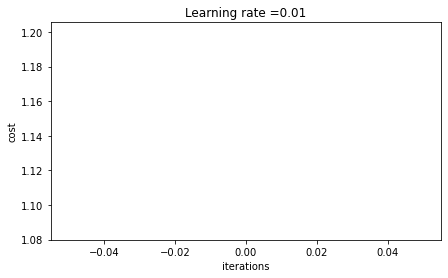

Cost after iteration 200: 1.4327212694091156


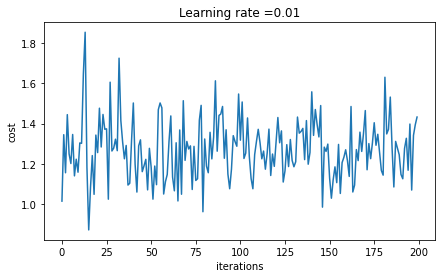

Cost after iteration 400: 1.3618495641446544


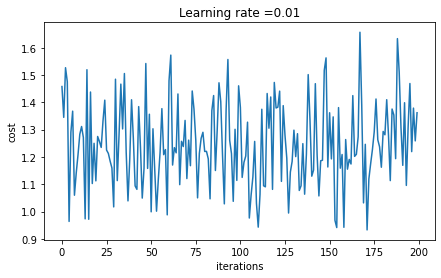

Cost after iteration 600: 1.4023624890229218


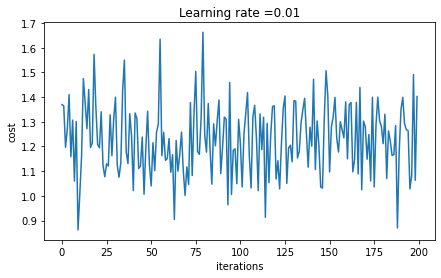

Cost after iteration 800: 1.247848250996221


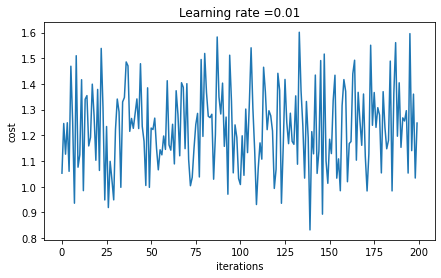

Cost after iteration 936: 1.2507984347268808


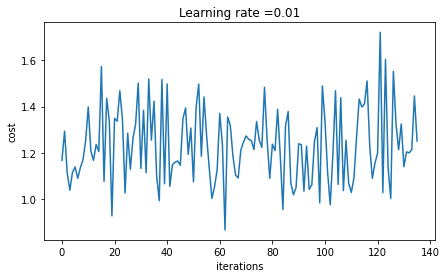

Epoch [14/15], Cost: 1.3097508214005456, Accuracy: 0.6827333333333333
Epoch :- 15
Cost after iteration 0: 1.2486670262625128


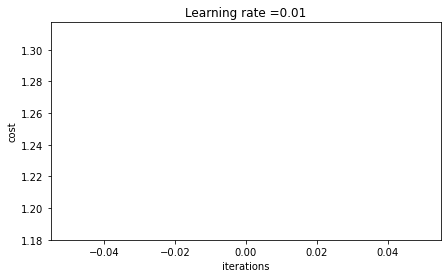

Cost after iteration 200: 1.2251620382580621


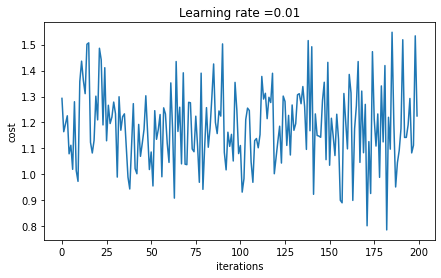

Cost after iteration 400: 1.1151208688502774


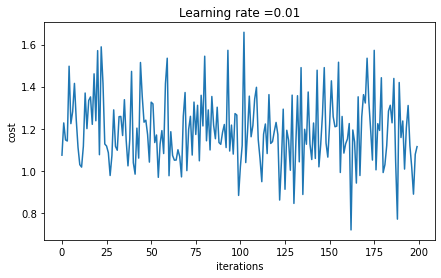

Cost after iteration 600: 0.8562925513006172


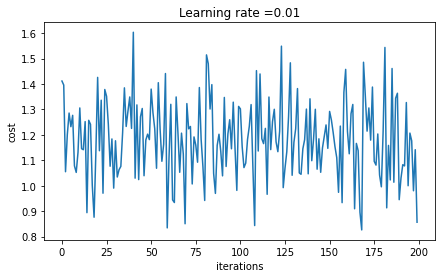

Cost after iteration 800: 1.0283517062406347


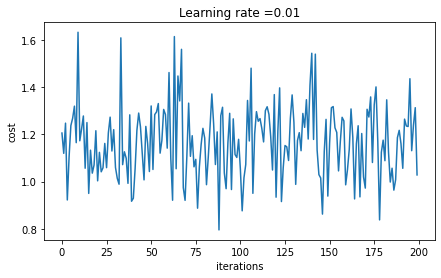

Cost after iteration 936: 1.1372390292716643


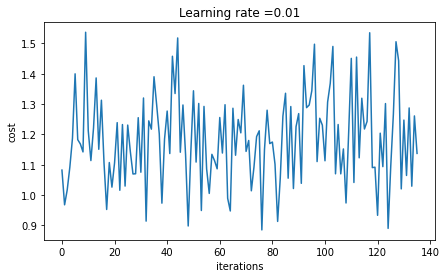

Epoch [15/15], Cost: 1.3119036193588103, Accuracy: 0.70405


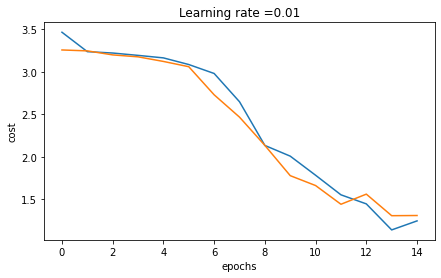

In [48]:
"""
Training the Neural Network 
Getting trained parameters and accuracy of train dataset

"""
parameters, train_acc = NeuralNet(train_set, forward = 'SIGMOID', learning_rate = 0.01, n_epochs = 15,batch_size = batchsize)


In [49]:
print ("On the TEST set:")
y_actual_test, y_pred_test = Accuracy(test_set, parameters,'SIGMOID', 10000)

On the TEST set:
accuracy is =0.729


/home/mansi/.conda/envs/hbp/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Text(0.5, 1.0, 'Confusion Matrix of Sigmoid Test Data')

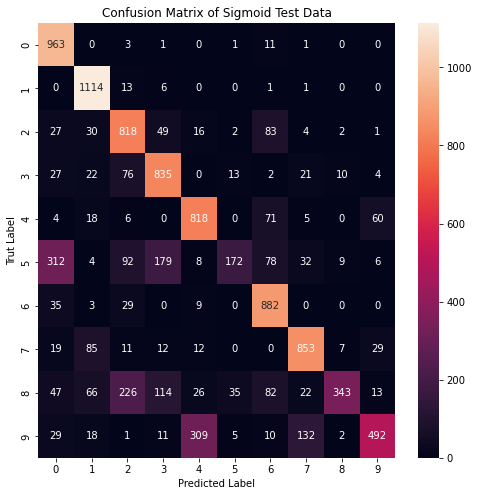

In [52]:
#to get the heatmap for the confusion matrix
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(confusion_matrix(y_actual_test, y_pred_test),annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Trut Label')
plt.title('Confusion Matrix of Sigmoid Test Data')

In [51]:
c = confusion_matrix(y_actual_test, y_pred_test)
print(c)

[[ 963    0    3    1    0    1   11    1    0    0]
 [   0 1114   13    6    0    0    1    1    0    0]
 [  27   30  818   49   16    2   83    4    2    1]
 [  27   22   76  835    0   13    2   21   10    4]
 [   4   18    6    0  818    0   71    5    0   60]
 [ 312    4   92  179    8  172   78   32    9    6]
 [  35    3   29    0    9    0  882    0    0    0]
 [  19   85   11   12   12    0    0  853    7   29]
 [  47   66  226  114   26   35   82   22  343   13]
 [  29   18    1   11  309    5   10  132    2  492]]


# Observations:

- **For $\eta = 0.01$, batch size = 64 and epochs = 15**
    * Train Accuracy = 71%
    * Test Accuracy = 72.9%
    
- **For $\eta = 0.04$, batch size = 64 and epochs = 15**
    * Train Accuracy = 85.33%
    * Test Accuracy = 85.77%

- **For $\eta = 0.01$, batch size = 64 and epochs = 10**
    * Train Accuracy = 89.33%
    * Test Accuracy = 88.77%

### **TanH activation function**

Epoch :- 1
Cost after iteration 0: 3.2504734281645433


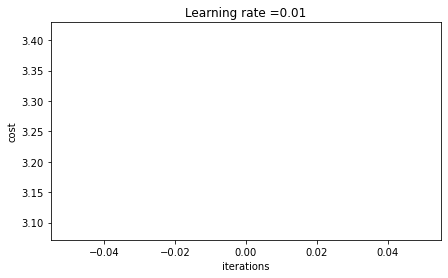

Cost after iteration 200: 1.025889824422842


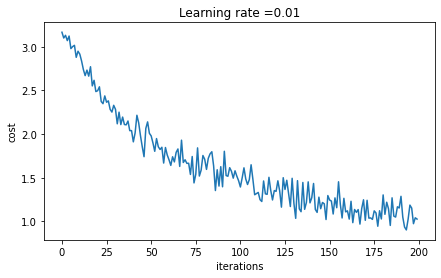

Cost after iteration 400: 0.9171325716701558


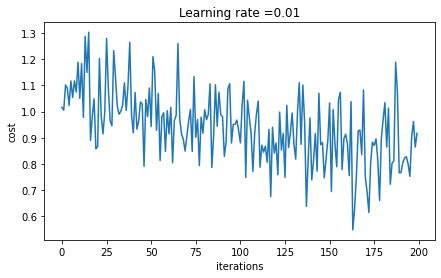

Cost after iteration 600: 0.4420592262501617


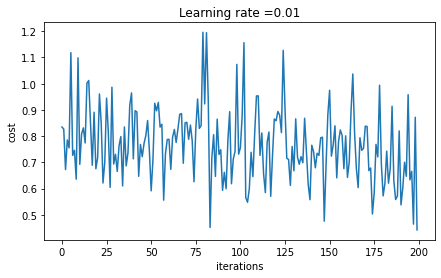

Cost after iteration 800: 0.6467155665617887


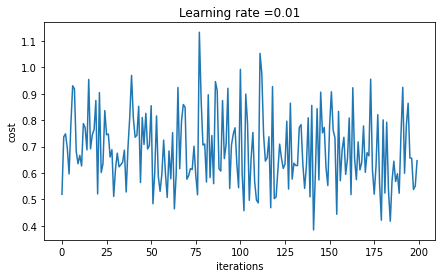

Cost after iteration 936: 0.9015668427845395


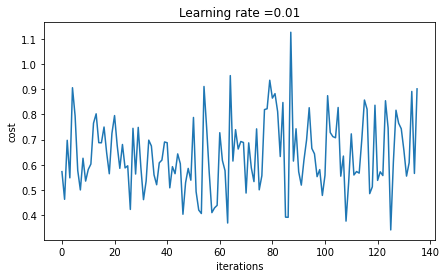

Epoch [1/10], Cost: 0.73098563588912, Accuracy: 0.8669833333333333
Epoch :- 2
Cost after iteration 0: 0.5767965908166091


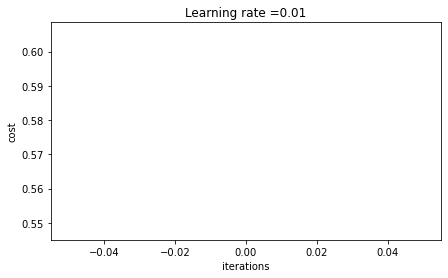

Cost after iteration 200: 0.5247855289496618


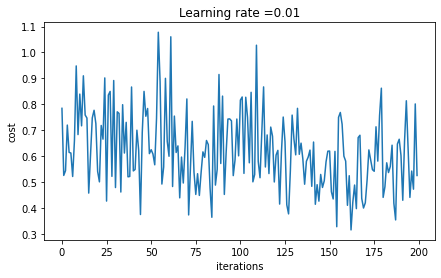

Cost after iteration 400: 0.545311984132836


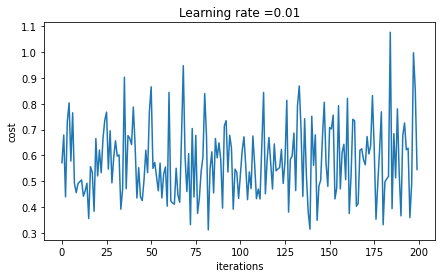

Cost after iteration 600: 0.5104357810997484


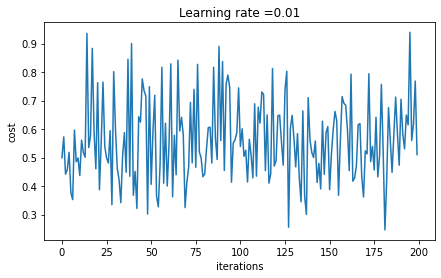

Cost after iteration 800: 0.6146499676482181


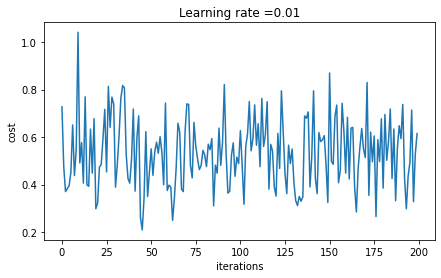

Cost after iteration 936: 0.2942403263047114


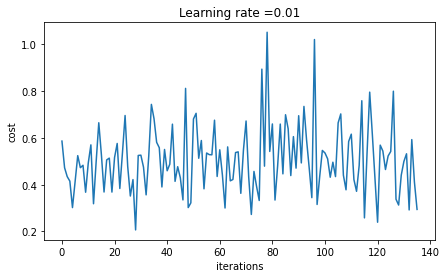

Epoch [2/10], Cost: 0.7444915539979109, Accuracy: 0.8964166666666666
Epoch :- 3
Cost after iteration 0: 0.31353642643724666


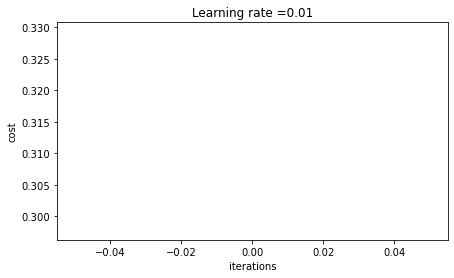

Cost after iteration 200: 0.26421399235563103


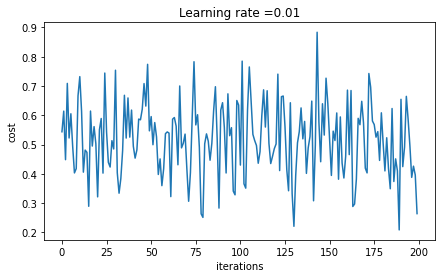

Cost after iteration 400: 0.6617175939141887


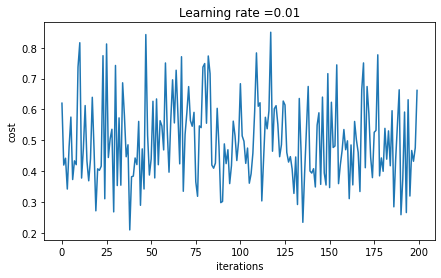

Cost after iteration 600: 0.41095362298555693


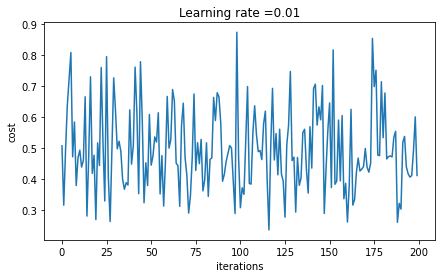

Cost after iteration 800: 0.37132743165865834


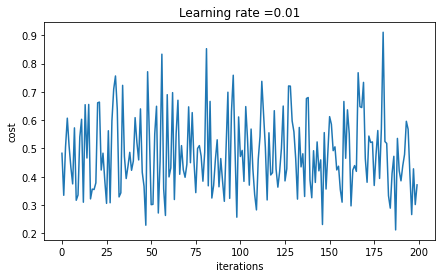

Cost after iteration 936: 0.2885809807624251


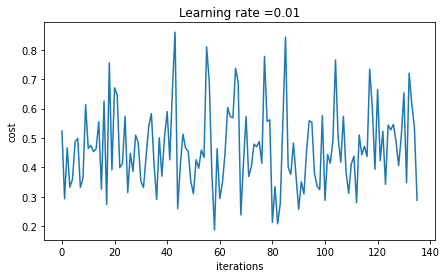

Epoch [3/10], Cost: 0.46773124358851237, Accuracy: 0.9057
Epoch :- 4
Cost after iteration 0: 0.41498946009103166


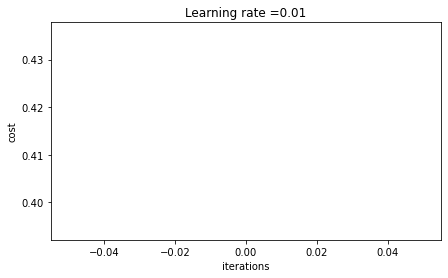

Cost after iteration 200: 0.4167846262548963


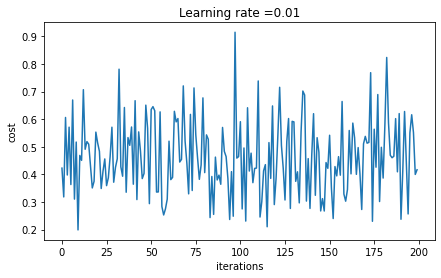

Cost after iteration 400: 0.3887639556078705


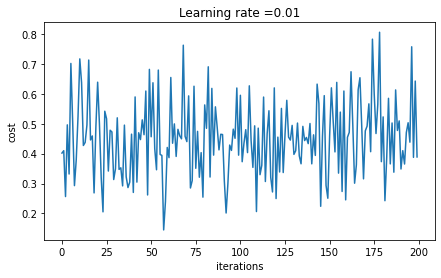

Cost after iteration 600: 0.4106593361286575


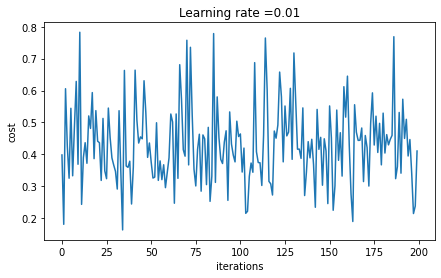

Cost after iteration 800: 0.38124901551994594


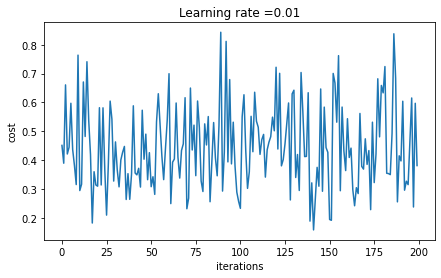

Cost after iteration 936: 0.3911343889593074


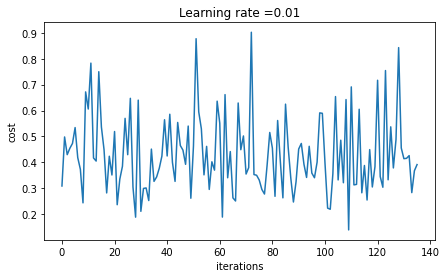

Epoch [4/10], Cost: 0.4560001814239254, Accuracy: 0.9102666666666667
Epoch :- 5
Cost after iteration 0: 0.44202049973646895


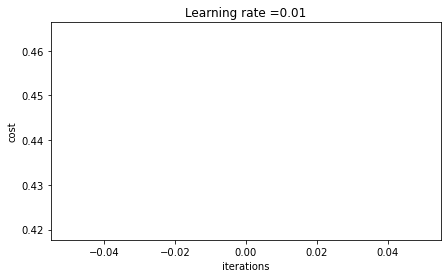

Cost after iteration 200: 0.6843250361729601


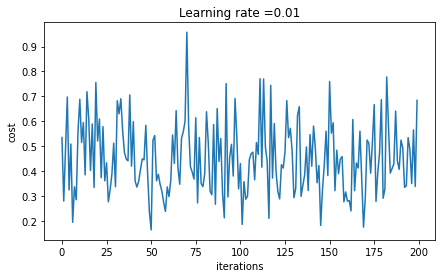

Cost after iteration 400: 0.635440139188582


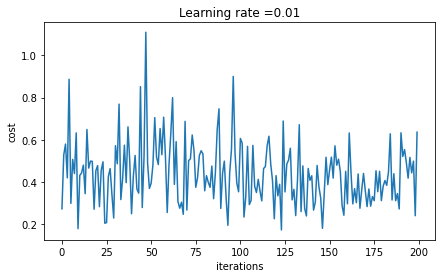

/home/mansi/.conda/envs/hbp/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/mansi/.conda/envs/hbp/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Cost after iteration 600: 0.1654618751232117


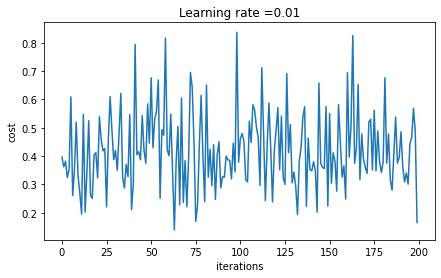

Cost after iteration 800: 0.36857840930813923


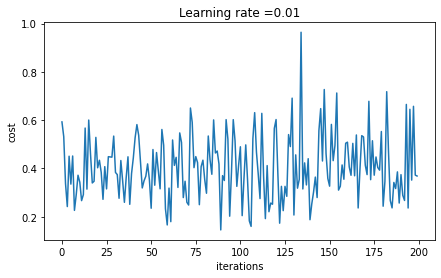

Cost after iteration 936: 0.5997273670136214


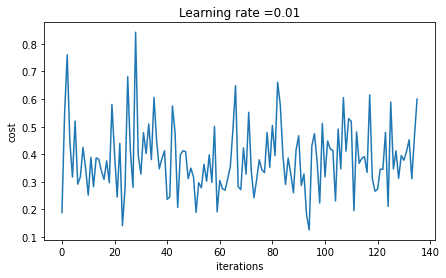

Epoch [5/10], Cost: 0.37838135252493427, Accuracy: 0.91755
Epoch :- 6
Cost after iteration 0: 0.3931208115432351


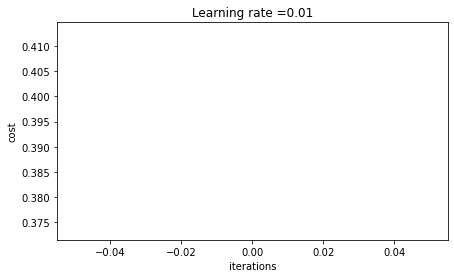

Cost after iteration 200: 0.3937902008325024


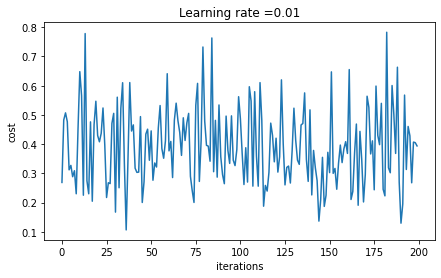

Cost after iteration 400: 0.5976813223088786


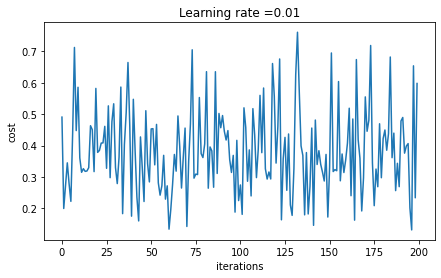

Cost after iteration 600: 0.27309248976646094


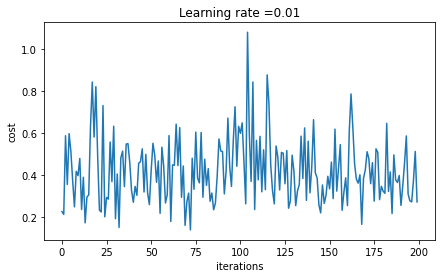

Cost after iteration 800: 0.30959965497505193


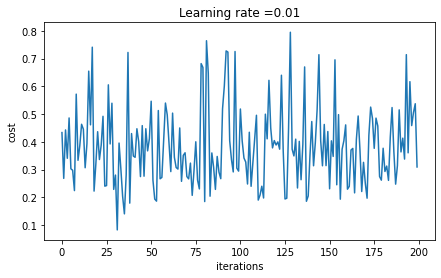

Cost after iteration 936: 0.4221586989856791


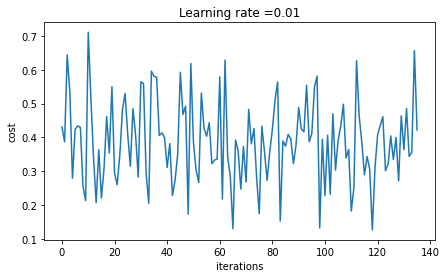

Epoch [6/10], Cost: 0.6327028388283296, Accuracy: 0.9191166666666667
Epoch :- 7
Cost after iteration 0: 0.2812387460306241


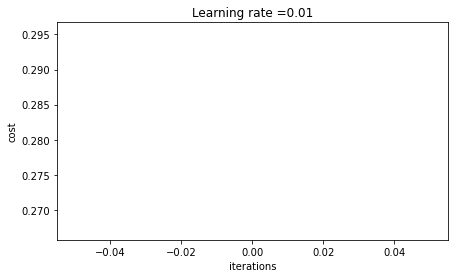

Cost after iteration 200: 0.39610921219685724


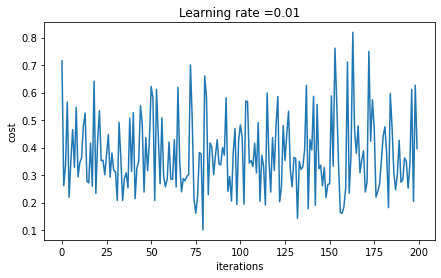

Cost after iteration 400: 0.1697825470360753


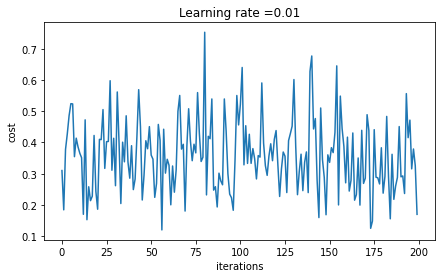

Cost after iteration 600: 0.23637286640033905


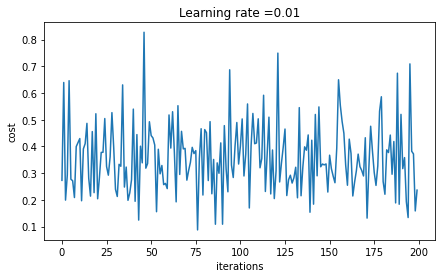

Cost after iteration 800: 0.2231713858335402


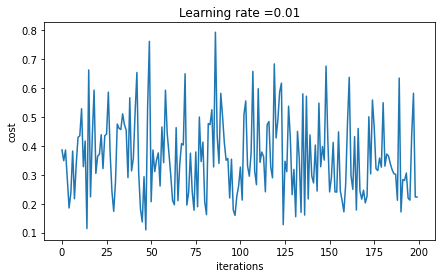

Cost after iteration 936: 0.3816246615444406


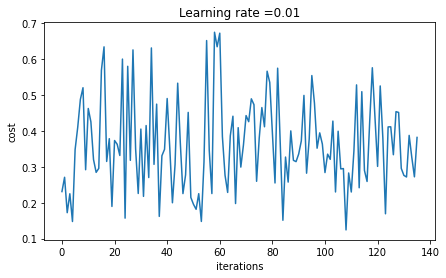

Epoch [7/10], Cost: 0.33409716846615795, Accuracy: 0.9304
Epoch :- 8
Cost after iteration 0: 0.2342484587426292


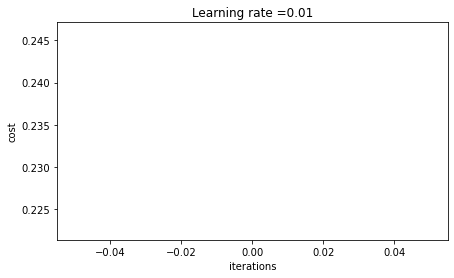

Cost after iteration 200: 0.748610558760294


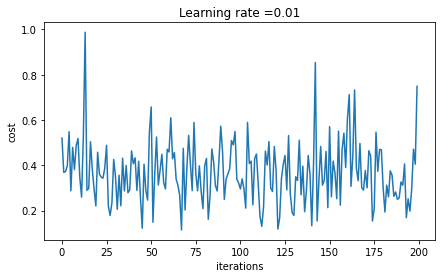

Cost after iteration 400: 0.19950850681122395


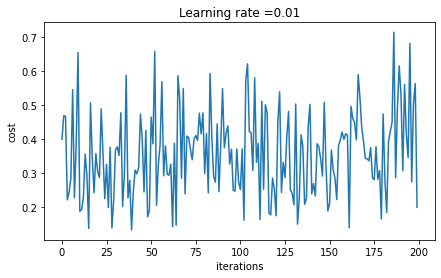

Cost after iteration 600: 0.46450185575508773


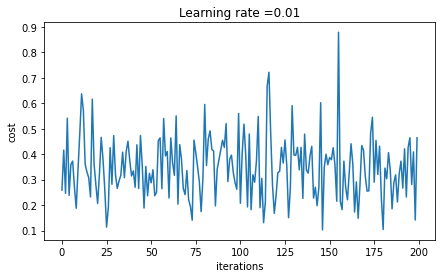

Cost after iteration 800: 0.4240508399326533


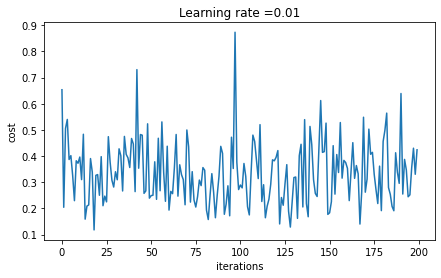

Cost after iteration 936: 0.4645277623081585


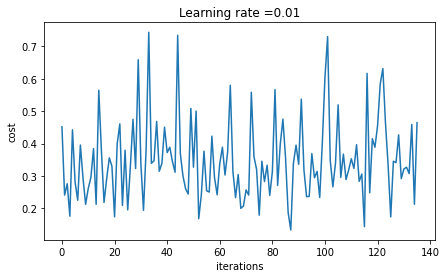

Epoch [8/10], Cost: 0.5599639802379782, Accuracy: 0.9274
Epoch :- 9
Cost after iteration 0: 0.2468490766990174


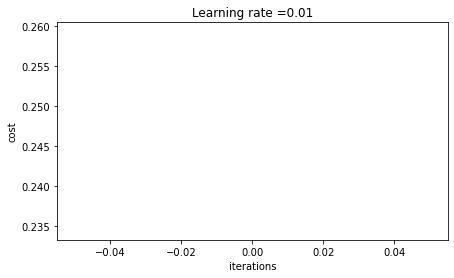

Cost after iteration 200: 0.4550093070453408


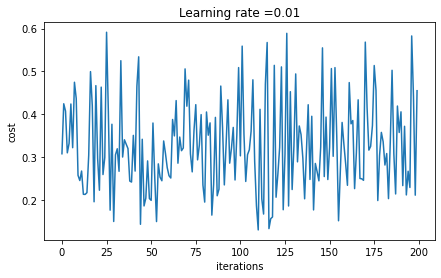

Cost after iteration 400: 0.3099795925099329


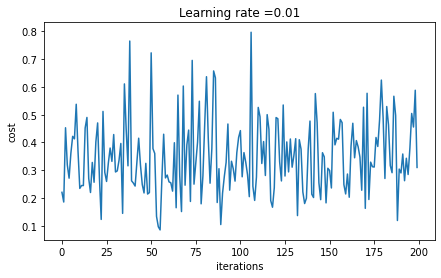

Cost after iteration 600: 0.44088062617304113


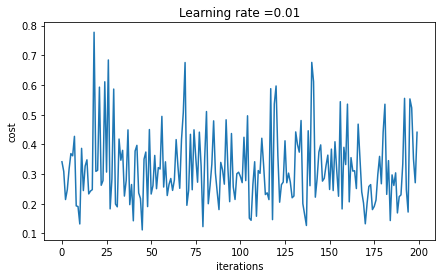

Cost after iteration 800: 0.3249643572183495


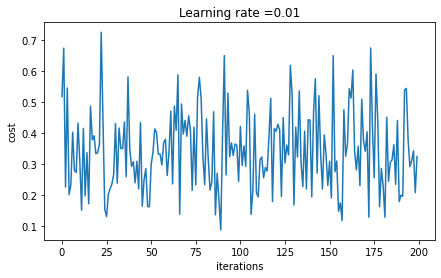

Cost after iteration 936: 0.368504026839143


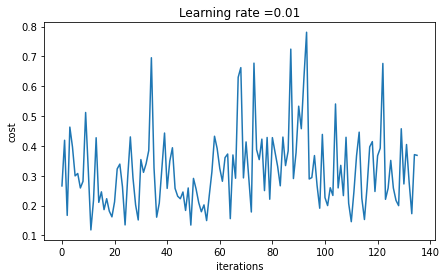

Epoch [9/10], Cost: 0.30635145991049484, Accuracy: 0.9337666666666666
Epoch :- 10
Cost after iteration 0: 0.18324171855399696


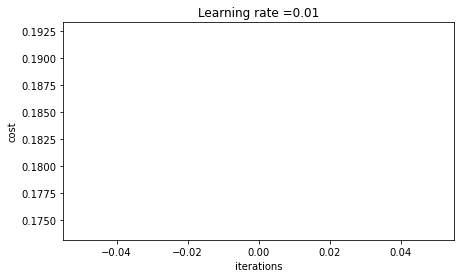

Cost after iteration 200: 0.3070982516766617


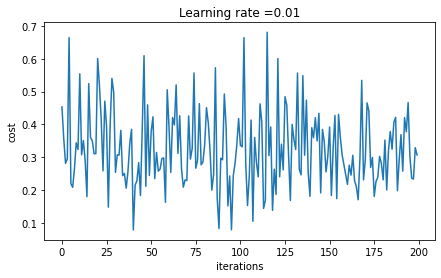

Cost after iteration 400: 0.26425147141419036


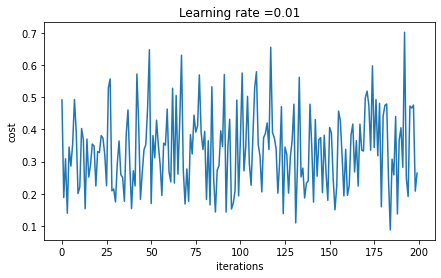

Cost after iteration 600: 0.13419884016244873


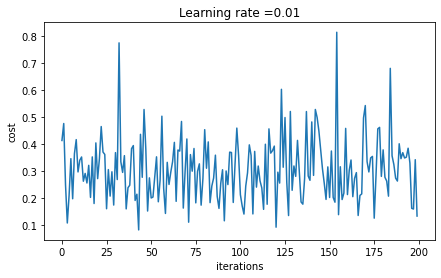

Cost after iteration 800: 0.31364281605815914


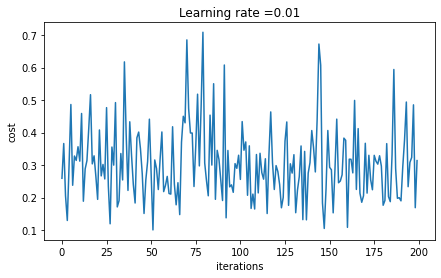

Cost after iteration 936: 0.18515234565997368


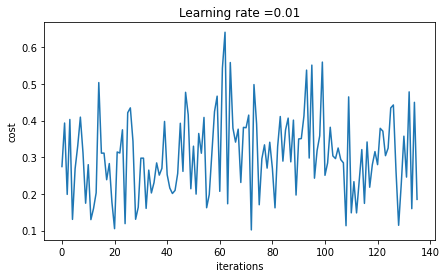

Epoch [10/10], Cost: 0.35797041964603027, Accuracy: 0.9377833333333333


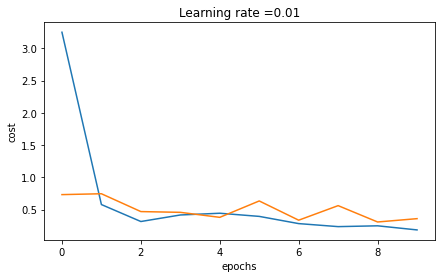

In [71]:
parameters_tanh, accuracy = NeuralNet(train_set, forward = 'TANH', learning_rate = 0.01, n_epochs = 10,batch_size = batchsize)

In [72]:
print ("On the TEST set:")
y_actual_test, y_pred_test = Accuracy(test_set, parameters_tanh, 'TANH', 10000)

On the TEST set:


/home/mansi/.conda/envs/hbp/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/mansi/.conda/envs/hbp/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


accuracy is =0.9368


Text(0.5, 1.0, 'Confusion Matrix of Sigmoid Test Data')

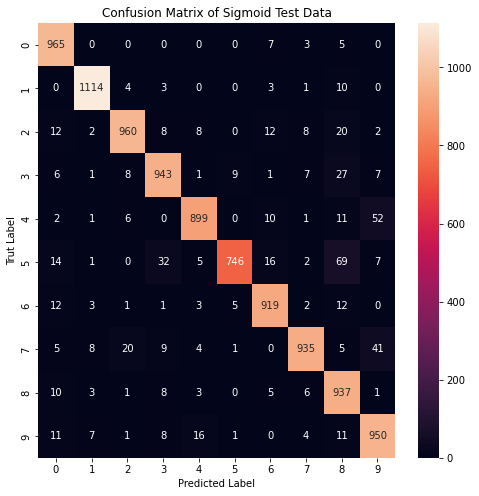

In [73]:
#to get the heatmap for the confusion matrix
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(confusion_matrix(y_actual_test, y_pred_test),annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Trut Label')
plt.title('Confusion Matrix of Sigmoid Test Data')

In [74]:
c = confusion_matrix(y_actual_test, y_pred_test)
print(c)

[[ 965    0    0    0    0    0    7    3    5    0]
 [   0 1114    4    3    0    0    3    1   10    0]
 [  12    2  960    8    8    0   12    8   20    2]
 [   6    1    8  943    1    9    1    7   27    7]
 [   2    1    6    0  899    0   10    1   11   52]
 [  14    1    0   32    5  746   16    2   69    7]
 [  12    3    1    1    3    5  919    2   12    0]
 [   5    8   20    9    4    1    0  935    5   41]
 [  10    3    1    8    3    0    5    6  937    1]
 [  11    7    1    8   16    1    0    4   11  950]]


# Observations:

- **For $\eta = 0.01$, batch size = 64 and epochs = 15**
    * Train Accuracy = 94.39%
    * Test Accuracy = 93.92%
    
- **For $\eta = 0.04$, batch size = 64 and epochs = 15**
    * Train Accuracy = 85.66%
    * Test Accuracy = 85.25%

- **For $\eta = 0.01$, batch size = 64 and epochs = 10**
    * Train Accuracy = 93.7%
    * Test Accuracy = 93.68%

# Overall Observations:

* Model gives good accuracy in all the three activation functions with their respective best parameters. But the Pytorch model was much faster and still gives better accuracy than all the three here.


* ReLU and TanH give better accuracy as compared to Sigmoid


* After applying regularisation we donot observe much change in accuracy, but overall performance becomes better


* When we observe PyTorch Model,
    * we can tell that tanh doesnot perform as good as sigmoid and relu
    * but in our model tanh gives good results, probably tanh works good with gradient descent than with adam optimiser
    * ReLu shows the best results
    * overall the accuracy is high


* Uniform random Initialisation gave better results than random initialisation or zero initialisation
